<a href="https://colab.research.google.com/github/snehach53/code/blob/main/Providence_Healthcare_Inventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial shape: (1010, 8)
Index(['Department', 'Item', 'Supplier', 'Quantity_Used', 'Reorder_Time_Days',
       'Was_Reordered', 'Wastage_Units', 'Usage_Date'],
      dtype='object')
   Department      Item    Supplier  Quantity_Used  Reorder_Time_Days  \
0     Surgery  Bandages  Supplier_C          132.0                2.7   
1    Pharmacy  Bandages  Supplier_C          126.0                6.2   
2  Pediatrics  Bandages  Supplier_B          133.0                6.3   
3    Pharmacy  Bandages  Supplier_A          115.0                3.4   
4    Pharmacy   IV Bags  Supplier_B          102.0                6.8   

  Was_Reordered  Wastage_Units  Usage_Date  
0            No              4  2024-01-01  
1            No              4  2024-01-02  
2           Yes              3  2024-01-03  
3            No              4  2024-01-04  
4           Yes              1  2024-01-05  

Missing values before cleaning:
Department            0
Item                  0
Supplier              0
Quan

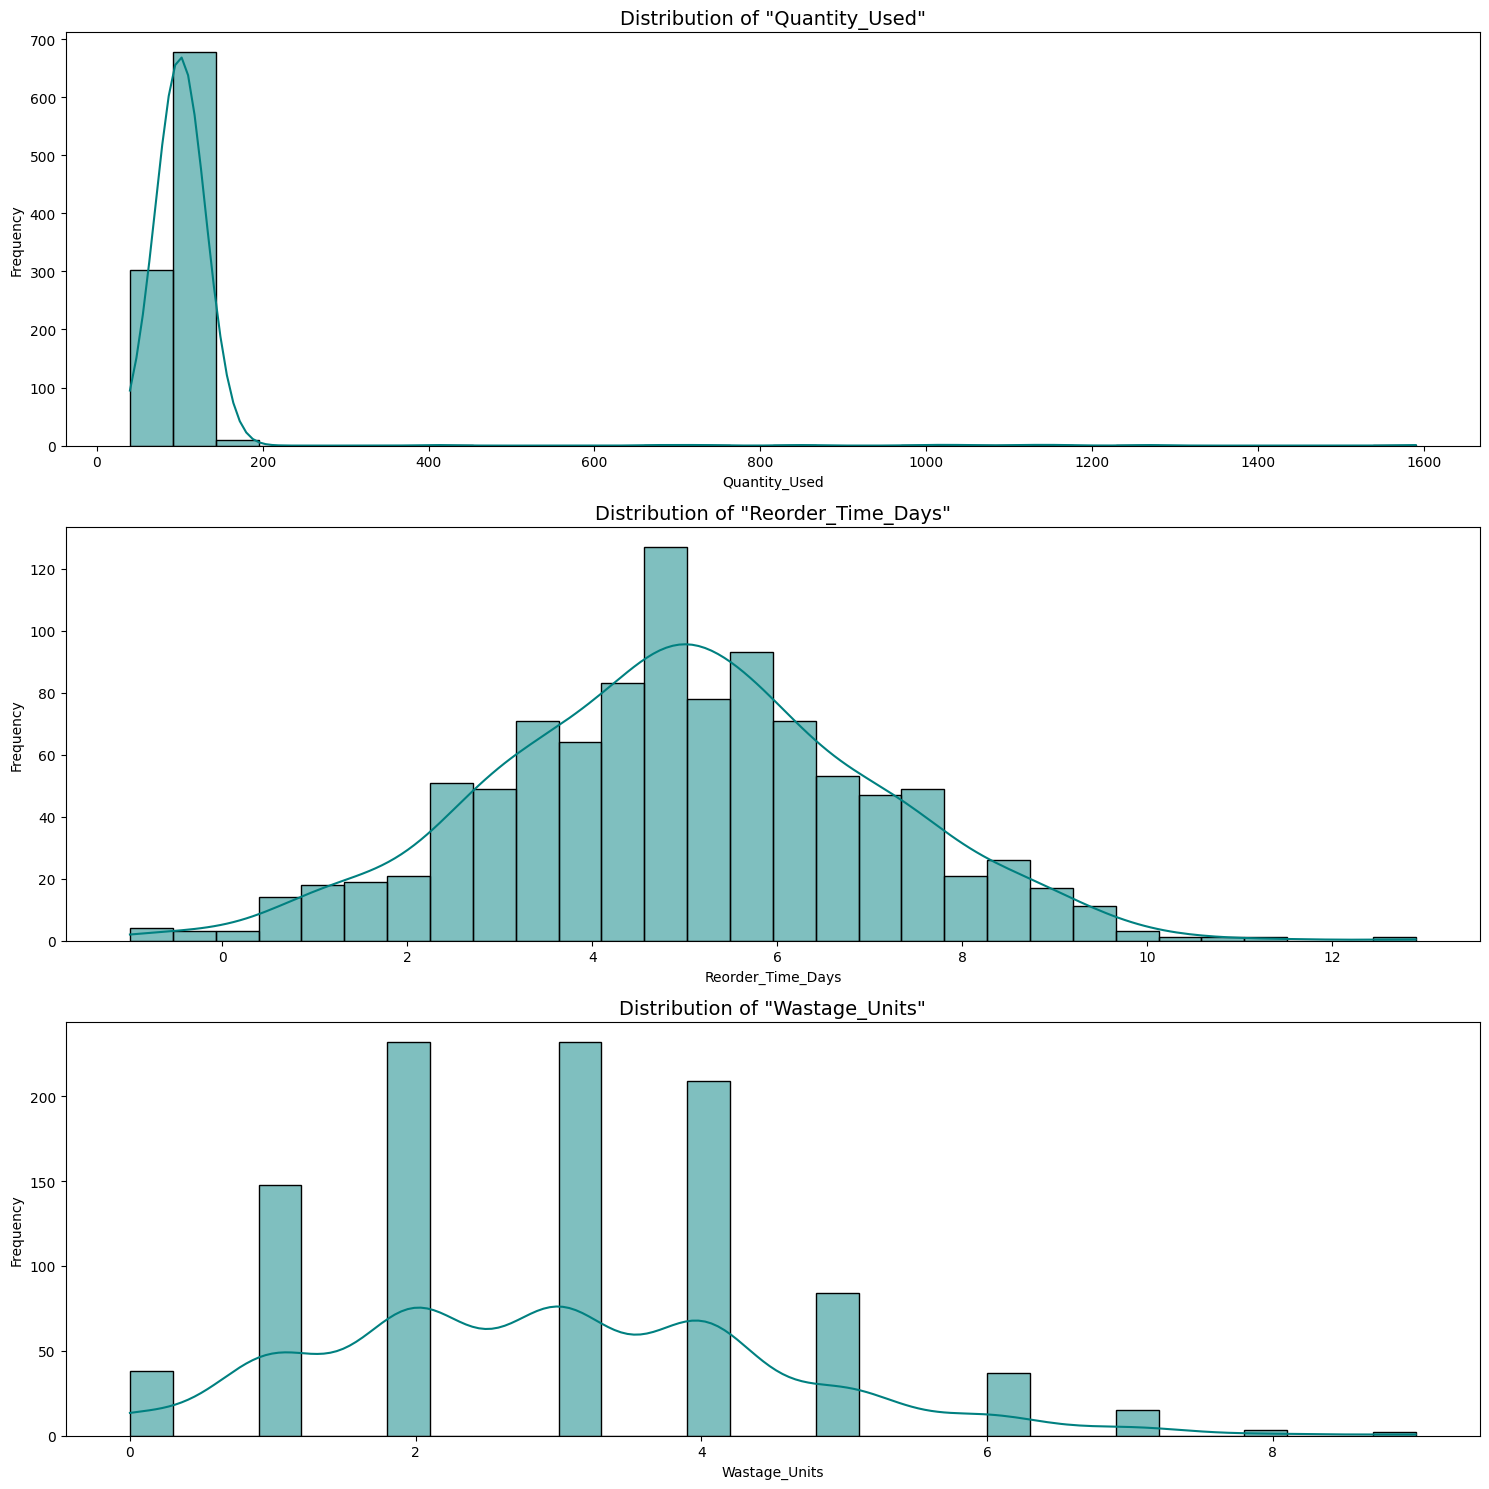

Total outliers found: 5
     Wastage_Units
178              9
258              8
675              8
857              9
899              8
Shape after removing outliers: (973, 8)

Cleaned dataset shape: (973, 8)

Sample cleaned data:
   Department      Item    Supplier  Quantity_Used  Reorder_Time_Days  \
0     Surgery  Bandages  Supplier_C          132.0                2.7   
1    Pharmacy  Bandages  Supplier_C          126.0                6.2   
2  Pediatrics  Bandages  Supplier_B          133.0                6.3   
3    Pharmacy  Bandages  Supplier_A          115.0                3.4   
4    Pharmacy   IV Bags  Supplier_B          102.0                6.8   

  Was_Reordered  Wastage_Units  Usage_Date  
0            No              4  2024-01-01  
1            No              4  2024-01-02  
2           Yes              3  2024-01-03  
3            No              4  2024-01-04  
4           Yes              1  2024-01-05  


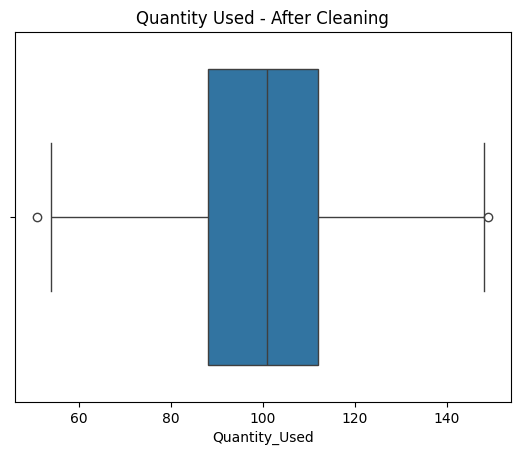

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import f_oneway
df = pd.read_csv("/content/Providence_Healthcare_Inventory__Messy_.csv")
print("Initial shape:", df.shape)
print(df.columns)
print(df.head())
# Step 2: Remove duplicate rows
df = df.drop_duplicates()

# Step 3: Show how many missing values exist
print("\nMissing values before cleaning:")
print(df.isnull().sum())
'''

# Step 4: Remove rows with missing values in critical fields
df = df.dropna(subset=['Quantity_Used', 'Reorder_Time_Days'])'''

# Impute missing 'Quantity_Used' using the median (robust to outliers)
median_quantity = df['Quantity_Used'].median()
df['Quantity_Used'] = df['Quantity_Used'].fillna(median_quantity)

# Impute missing 'Reorder_Time_Days' using the mean (normal distribution assumption)
mean_reorder_time = df['Reorder_Time_Days'].mean()
df['Reorder_Time_Days'] = df['Reorder_Time_Days'].fillna(mean_reorder_time)

#Visualization of Numeric Columns to know the type of dataspread
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the plot
plt.figure(figsize=(15, 5 * len(numeric_columns)))

# Plot histogram for each numeric column
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f'Distribution of "{col}"', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Step 5: Remove outliers from 'Quantity_Used' using IQR as data is right skewed

Q1 = df['Quantity_Used'].quantile(0.25)
Q3 = df['Quantity_Used'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Quantity_Used'] >= lower_bound) & (df['Quantity_Used'] <= upper_bound)]


# Remove Outliers from "Reorder_Time_Days" Drop NA and compute Z-scores
z_scores = zscore(df['Reorder_Time_Days'].dropna())

# Keep only those with absolute Z-score <= 3
cleaned = df.loc[df['Reorder_Time_Days'].dropna().index[np.abs(z_scores) <= 3]]
# Step 1: Calculate IQR
Q1 = df['Wastage_Units'].quantile(0.25)
Q3 = df['Wastage_Units'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers "Wastage_Units"
outliers = df[(df['Wastage_Units'] < lower_bound) | (df['Wastage_Units'] > upper_bound)]

# Step 4: Output result
print(f"Total outliers found: {outliers.shape[0]}")
print(outliers[['Wastage_Units']].head())  # show first few outliers
# Step 1: Calculate Q1, Q3, and IQR
Q1 = df['Wastage_Units'].quantile(0.25)
Q3 = df['Wastage_Units'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove outliers
df = df[(df['Wastage_Units'] >= lower_bound) & (df['Wastage_Units'] <= upper_bound)]

# Step 4: Confirm new shape
print("Shape after removing outliers:", df.shape)


# Step 6: Reset index for a clean dataset
df.reset_index(drop=True, inplace=True)

# Step 7: Show final results
print("\nCleaned dataset shape:", df.shape)
print("\nSample cleaned data:")
print(df.head())

# Step 8: Optional visual check using a boxplot
sns.boxplot(x=df['Quantity_Used'])
plt.title('Quantity Used - After Cleaning')
plt.show()


In [ ]:
# Group by department and sum Quantity_Used
department_consumption = df.groupby('Department')['Quantity_Used'].sum().sort_values(ascending=False)

# Convert to DataFrame for better display
department_consumption_df = department_consumption.reset_index(name='Total_Quantity_Used')

# Display the result
print(department_consumption_df)

   Department  Total_Quantity_Used
0          ER              21023.0
1    Pharmacy              19685.0
2     Surgery              19357.0
3         ICU              18878.0
4  Pediatrics              18808.0


In [ ]:
# Group by Department to calculate total and mean Quantity_Used
department_stats = df.groupby('Department')['Quantity_Used'].agg(
    Total_Quantity_Used='sum',
    Average_Quantity_Used='mean'
).sort_values(by='Total_Quantity_Used', ascending=False).reset_index()

# Display the result
print(department_stats)


   Department  Total_Quantity_Used  Average_Quantity_Used
0          ER              21023.0             101.560386
1    Pharmacy              19685.0              99.923858
2     Surgery              19357.0              97.762626
3         ICU              18878.0             101.494624
4  Pediatrics              18808.0             101.664865


In [ ]:
departments = df['Department'].unique()
groups = [df[df['Department'] == dept]['Quantity_Used'] for dept in departments]

# Perform one-way ANOVA test
f_stat, p_value = f_oneway(*groups)

# Display result
print("ANOVA Test Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("❗ Reject the null hypothesis: At least one department's inventory usage is significantly different.")
else:
    print("✅ Fail to reject the null hypothesis: No significant difference in inventory usage among departments.")

ANOVA Test Results:
F-statistic: 1.6851
P-value: 0.1512
✅ Fail to reject the null hypothesis: No significant difference in inventory usage among departments.


**Is reorder time different for reordered vs not reordered items?**

Remaining rows: 966
Minimum Reorder_Time_Days: 0.0
Group-wise Summary:

               count      mean       std  min  25%  50%  75%   max
Was_Reordered                                                     
No             377.0  5.036468  2.020606 -0.8  3.7  5.1  6.4  10.7
Yes            596.0  4.968451  2.043486 -1.0  3.5  4.9  6.3  12.9


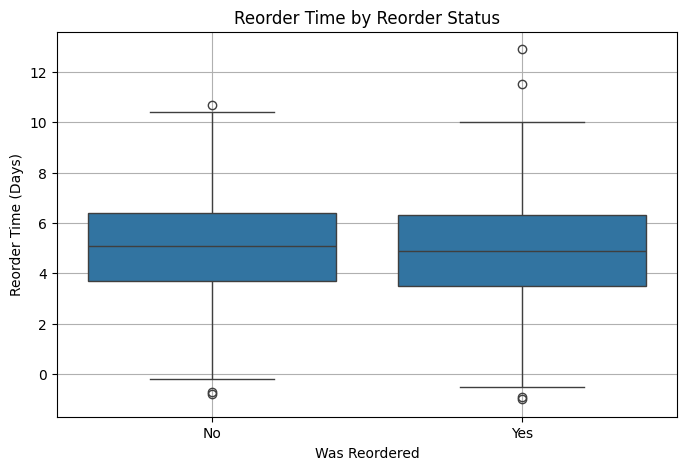

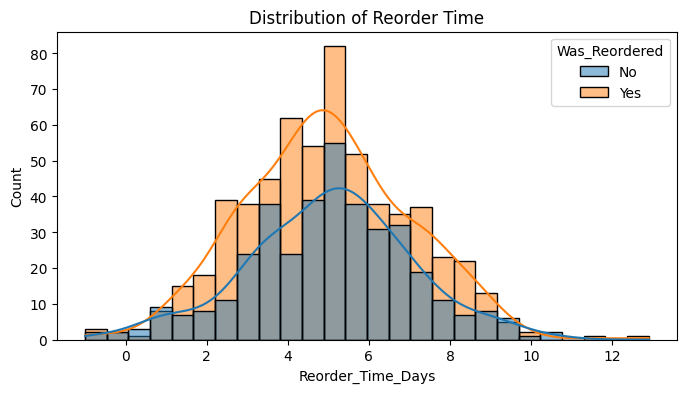

In [6]:
#Drop missing values
df = df.dropna(subset=['Reorder_Time_Days', 'Was_Reordered'])
df_clean = df[df['Reorder_Time_Days'] >= 0]

#  Confirm it's cleaned
print(f"Remaining rows: {len(df_clean)}")
print(f"Minimum Reorder_Time_Days: {df_clean['Reorder_Time_Days'].min()}")

# Group-wise summary
print("Group-wise Summary:\n")
print(df.groupby('Was_Reordered')['Reorder_Time_Days'].describe())

# Boxplot to visualize distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x='Was_Reordered', y='Reorder_Time_Days', data=df)
plt.title('Reorder Time by Reorder Status')
plt.xlabel('Was Reordered')
plt.ylabel('Reorder Time (Days)')
plt.grid(True)
plt.show()

# Histogram (optional)
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Reorder_Time_Days', hue='Was_Reordered', kde=True)
plt.title('Distribution of Reorder Time')
plt.show()

EDA does not show a **obvious** difference in reorder time between the two groups.
But we still need a t-test to confirm whether this small difference is statistically significant or just random noise.
H₀ (Null Hypothesis):There is no difference in average Reorder_Time_Daysbetween reordered and non-reordered items.
H₁ (Alternative Hypothesis):There is a difference in average Reorder_Time_Days between reordered and non-reordered items.

In [8]:

from scipy.stats import ttest_ind

# Remove negative and missing values
df_clean = df[(df['Reorder_Time_Days'] >= 0) & df['Was_Reordered'].notna()]

# Separate groups
reordered_yes = df_clean[df_clean['Was_Reordered'] == 'Yes']['Reorder_Time_Days']
reordered_no = df_clean[df_clean['Was_Reordered'] == 'No']['Reorder_Time_Days']

# Perform Welch's t-test (does not assume equal variance)
t_stat, p_value = ttest_ind(reordered_yes, reordered_no, equal_var=False)

# Print the results
print("T-Test for Reorder_Time_Days vs Reorder Status")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("❗ Reject H₀: Reorder time is significantly different between groups.")
else:
    print("✅ Fail to reject H₀: No significant difference in reorder time between groups.")

T-Test for Reorder_Time_Days vs Reorder Status
T-statistic: -0.7496
P-value: 0.4537
✅ Fail to reject H₀: No significant difference in reorder time between groups.
